# Declaration of Originality

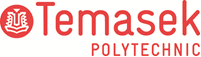

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Goh Seng Kang (2400312A)
* Tutorial Group                : PC04
* Tutor						    : Mr Emile SABASTIAN
* Submission Date               : 


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [271]:
## Import libraries
import pandas as pd
import numpy as np

# 1. Business Understanding
Goal: ?

# 2. Data Understanding

## 2.1 Load dataset

In [272]:
## Read *.csv file into pandas DataFrame
df = pd.read_csv('computer_prices_all.csv')
df

,device_type,brand,model,release_year,os,form_factor,cpu_brand,cpu_model,cpu_tier,cpu_cores,...,resolution,refresh_hz,battery_wh,charger_watts,psu_watts,wifi,bluetooth,weight_kg,warranty_months,price
0,Desktop,Samsung,Samsung Forge XDI,2022,Windows,ATX,Intel,Intel i5-11129,3,12,...,2560x1440,90,0,0,750,Wi-Fi 6,5.1,11.00,36,1383.99
1,Laptop,Samsung,Samsung Pro KM8,2022,Windows,Mainstream,Intel,Intel i7-11114,4,12,...,1920x1080,90,56,120,0,Wi-Fi 6,5.3,2.03,12,2274.99
2,Desktop,Lenovo,Lenovo Strix BIE,2024,macOS,SFF,AMD,AMD Ryzen 5 5168,2,8,...,3440x1440,120,0,0,850,Wi-Fi 6,5.0,7.00,24,1879.99
3,Desktop,Dell,Dell Cube AXR,2024,Windows,ATX,AMD,AMD Ryzen 5 7550,2,6,...,3440x1440,120,0,0,650,Wi-Fi 6,5.2,6.00,36,1331.99
4,Laptop,Gigabyte,Gigabyte Pro IX1,2024,Linux,Gaming,AMD,AMD Ryzen 7 6230,5,16,...,2560x1600,90,80,90,0,Wi-Fi 6,5.2,1.50,12,2681.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Laptop,ASUS,ASUS Pro ZWL,2023,Windows,Mainstream,Intel,Intel i7-13721,4,12,...,1920x1080,144,90,180,0,Wi-Fi 6,5.1,1.87,24,1712.99
99996,Laptop,Lenovo,Lenovo Stealth 014,2018,Windows,Ultrabook,AMD,AMD Ryzen 5 5117,2,8,...,2560x1600,90,50,65,0,Wi-Fi 6,5.1,1.37,12,1258.99
99997,Laptop,ASUS,ASUS Zen LKD,2020,Windows,Mainstream,Intel,Intel i5-12677,2,6,...,2560x1600,120,99,180,0,Wi-Fi 6,4.2,1.17,12,1686.99
99998,Laptop,ASUS,ASUS Blade DH6,2020,Windows,Mainstream,AMD,AMD Ryzen 7 4590,4,12,...,2560x1600,120,60,90,0,Wi-Fi 6,5.3,1.70,24,2164.99


In [273]:
## Remove Laptop rows as we are only interested in Desktop prices, specifically gaming desktops
df = df[df['device_type'] != 'Laptop']
df

,device_type,brand,model,release_year,os,form_factor,cpu_brand,cpu_model,cpu_tier,cpu_cores,...,resolution,refresh_hz,battery_wh,charger_watts,psu_watts,wifi,bluetooth,weight_kg,warranty_months,price
0,Desktop,Samsung,Samsung Forge XDI,2022,Windows,ATX,Intel,Intel i5-11129,3,12,...,2560x1440,90,0,0,750,Wi-Fi 6,5.1,11.0,36,1383.99
2,Desktop,Lenovo,Lenovo Strix BIE,2024,macOS,SFF,AMD,AMD Ryzen 5 5168,2,8,...,3440x1440,120,0,0,850,Wi-Fi 6,5.0,7.0,24,1879.99
3,Desktop,Dell,Dell Cube AXR,2024,Windows,ATX,AMD,AMD Ryzen 5 7550,2,6,...,3440x1440,120,0,0,650,Wi-Fi 6,5.2,6.0,36,1331.99
5,Desktop,MSI,MSI Think KSG,2025,Windows,ATX,Intel,Intel i7-10369,5,16,...,2560x1440,90,0,0,1000,Wi-Fi 5,5.0,9.0,36,2751.99
6,Desktop,Apple,Apple Arena R5Q,2024,Windows,ATX,Apple,Apple M2,2,6,...,2560x1440,60,0,0,850,Wi-Fi 6,5.1,9.0,24,1609.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99989,Desktop,Apple,Apple Think KPV,2020,Windows,Full-Tower,Apple,Apple M3,4,12,...,3440x1440,60,0,0,1200,Wi-Fi 6,5.2,7.0,24,2121.99
99991,Desktop,Lenovo,Lenovo Station A87,2024,Windows,Micro-ATX,AMD,AMD Ryzen 5 4642,3,12,...,2560x1440,60,0,0,750,Wi-Fi 6,5.0,7.0,12,1595.99
99992,Desktop,MSI,MSI Creator 8TU,2018,macOS,SFF,Intel,Intel i5-13152,3,8,...,3840x2160,240,0,0,650,Wi-Fi 6E,5.0,4.0,24,2309.99
99994,Desktop,Lenovo,Lenovo Creator 2G4,2023,Linux,Mini-ITX,Intel,Intel i5-10539,3,12,...,3440x1440,120,0,0,850,Wi-Fi 5,4.2,7.0,24,1953.99


## 2.2 Summary Statistics

In [274]:
## Understand the type of variable for each column
df.dtypes

device_type             object
brand                   object
model                   object
release_year             int64
os                      object
form_factor             object
cpu_brand               object
cpu_model               object
cpu_tier                 int64
cpu_cores                int64
cpu_threads              int64
cpu_base_ghz           float64
cpu_boost_ghz          float64
gpu_brand               object
gpu_model               object
gpu_tier                 int64
vram_gb                  int64
ram_gb                   int64
storage_type            object
storage_gb               int64
storage_drive_count      int64
display_type            object
display_size_in        float64
resolution              object
refresh_hz               int64
battery_wh               int64
charger_watts            int64
psu_watts                int64
wifi                    object
bluetooth              float64
weight_kg              float64
warranty_months          int64
price   

In [275]:
## Check for missing data
df.isnull().sum()

device_type            0
brand                  0
model                  0
release_year           0
os                     0
form_factor            0
cpu_brand              0
cpu_model              0
cpu_tier               0
cpu_cores              0
cpu_threads            0
cpu_base_ghz           0
cpu_boost_ghz          0
gpu_brand              0
gpu_model              0
gpu_tier               0
vram_gb                0
ram_gb                 0
storage_type           0
storage_gb             0
storage_drive_count    0
display_type           0
display_size_in        0
resolution             0
refresh_hz             0
battery_wh             0
charger_watts          0
psu_watts              0
wifi                   0
bluetooth              0
weight_kg              0
warranty_months        0
price                  0
dtype: int64

In [276]:
## Describe data distribution
## describe first 16 columns 
df.iloc[:, 0:16].describe(include='all')

,device_type,brand,model,release_year,os,form_factor,cpu_brand,cpu_model,cpu_tier,cpu_cores,cpu_threads,cpu_base_ghz,cpu_boost_ghz,gpu_brand,gpu_model,gpu_tier
count,40156,40156,40156,40156.000000,40156,40156,40156,40156,40156.000000,40156.000000,40156.000000,40156.000000,40156.000000,40156,40156,40156.000000
unique,1,10,39879,NaN,4,5,3,19160,NaN,NaN,NaN,NaN,NaN,4,49,NaN
top,Desktop,Lenovo,Samsung Station VI0,NaN,Windows,ATX,Intel,Apple M1,NaN,NaN,NaN,NaN,NaN,NVIDIA,Apple Integrated,NaN
freq,40156,6485,2,NaN,28882,15597,21131,572,NaN,NaN,NaN,NaN,NaN,21967,7529,NaN
mean,NaN,NaN,NaN,2022.316491,NaN,NaN,NaN,NaN,3.142818,10.724475,19.757346,2.828564,3.768578,NaN,NaN,3.163462
std,NaN,NaN,NaN,2.021924,NaN,NaN,NaN,NaN,1.373042,5.102002,9.818682,0.274608,0.290068,NaN,NaN,1.456368
min,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN,1.000000,4.000000,4.000000,2.400000,3.200000,NaN,NaN,1.000000
25%,NaN,NaN,NaN,2021.000000,NaN,NaN,NaN,NaN,2.000000,8.000000,12.000000,2.600000,3.600000,NaN,NaN,2.000000
50%,NaN,NaN,NaN,2023.000000,NaN,NaN,NaN,NaN,3.000000,10.000000,16.000000,2.800000,3.800000,NaN,NaN,3.000000
75%,NaN,NaN,NaN,2024.000000,NaN,NaN,NaN,NaN,4.000000,14.000000,24.000000,3.000000,4.000000,NaN,NaN,4.000000


In [277]:
## describe last 17 columns
df.iloc[:, 16:].describe(include='all')

,vram_gb,ram_gb,storage_type,storage_gb,storage_drive_count,display_type,display_size_in,resolution,refresh_hz,battery_wh,charger_watts,psu_watts,wifi,bluetooth,weight_kg,warranty_months,price
count,40156.000000,40156.000000,40156,40156.000000,40156.000000,40156,40156.000000,40156,40156.000000,40156.0,40156.0,40156.000000,40156,40156.000000,40156.000000,40156.000000,40156.000000
unique,NaN,NaN,4,NaN,NaN,6,NaN,4,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN
top,NaN,NaN,NVMe,NaN,NaN,LED,NaN,1920x1080,NaN,NaN,NaN,NaN,Wi-Fi 6,NaN,NaN,NaN,NaN
freq,NaN,NaN,18083,NaN,NaN,12943,NaN,15104,NaN,NaN,NaN,NaN,18640,NaN,NaN,NaN,NaN
mean,6.416426,41.562705,NaN,900.092838,2.043505,NaN,27.823588,NaN,98.524330,0.0,0.0,678.654497,NaN,5.085315,8.280929,22.140950,1819.545284
std,4.101515,32.820845,NaN,772.362905,0.957378,NaN,3.355856,NaN,43.319296,0.0,0.0,194.055038,NaN,0.245282,3.056802,10.231462,532.550729
min,0.000000,8.000000,NaN,256.000000,1.000000,NaN,24.000000,NaN,60.000000,0.0,0.0,300.000000,NaN,4.200000,4.000000,12.000000,388.990000
25%,4.000000,16.000000,NaN,512.000000,1.000000,NaN,24.000000,NaN,60.000000,0.0,0.0,550.000000,NaN,5.000000,6.000000,12.000000,1433.990000
50%,6.000000,32.000000,NaN,512.000000,2.000000,NaN,27.000000,NaN,90.000000,0.0,0.0,650.000000,NaN,5.100000,8.000000,24.000000,1767.990000
75%,10.000000,64.000000,NaN,1024.000000,3.000000,NaN,32.000000,NaN,120.000000,0.0,0.0,750.000000,NaN,5.200000,10.000000,24.000000,2152.990000


In [278]:
## Drop unnecessary columns (Before EDA)
df = df.drop(columns=[
    'model',           # not needed as we are only predicting price range
    'device_type',     # not needed as only 1 unique value 'Desktop' exists after filtering
    'release_year',    # not needed as we want to only predict based on hardware specs
    'form_factor',     # not needed as we want to only predict based on hardware specs
    'battery_wh',      # not needed as only 1 unique value 0 exists after filtering
    'charger_watts',   # not needed as only 1 unique value 0 exists after filtering
    'weight_kg',       # not needed as we want to only predict based on hardware specs
    'brand'            # not needed as we want to only predict based on hardware specs
])

df


,os,cpu_brand,cpu_model,cpu_tier,cpu_cores,cpu_threads,cpu_base_ghz,cpu_boost_ghz,gpu_brand,gpu_model,...,storage_drive_count,display_type,display_size_in,resolution,refresh_hz,psu_watts,wifi,bluetooth,warranty_months,price
0,Windows,Intel,Intel i5-11129,3,12,24,2.8,3.8,NVIDIA,RTX 40 60,...,1,LED,27.0,2560x1440,90,750,Wi-Fi 6,5.1,36,1383.99
2,macOS,AMD,AMD Ryzen 5 5168,2,8,16,2.6,3.6,NVIDIA,RTX 40 50,...,2,LED,32.0,3440x1440,120,850,Wi-Fi 6,5.0,24,1879.99
3,Windows,AMD,AMD Ryzen 5 7550,2,6,12,2.6,3.6,AMD,RX 7000 60,...,2,IPS,27.0,3440x1440,120,650,Wi-Fi 6,5.2,36,1331.99
5,Windows,Intel,Intel i7-10369,5,16,32,3.2,4.3,NVIDIA,RTX 40 90,...,2,LED,24.0,2560x1440,90,1000,Wi-Fi 5,5.0,36,2751.99
6,Windows,Apple,Apple M2,2,6,6,2.6,3.5,Apple,Apple Integrated,...,2,VA,32.0,2560x1440,60,850,Wi-Fi 6,5.1,24,1609.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99989,Windows,Apple,Apple M3,4,12,12,3.0,4.0,Apple,Apple Integrated,...,2,Mini-LED,27.0,3440x1440,60,1200,Wi-Fi 6,5.2,24,2121.99
99991,Windows,AMD,AMD Ryzen 5 4642,3,12,24,2.8,3.6,NVIDIA,RTX 30 70,...,2,OLED,27.0,2560x1440,60,750,Wi-Fi 6,5.0,12,1595.99
99992,macOS,Intel,Intel i5-13152,3,8,16,2.8,3.8,NVIDIA,RTX 40 70,...,2,LED,27.0,3840x2160,240,650,Wi-Fi 6E,5.0,24,2309.99
99994,Linux,Intel,Intel i5-10539,3,12,24,2.8,3.8,NVIDIA,RTX 30 60,...,3,OLED,24.0,3440x1440,120,850,Wi-Fi 5,4.2,24,1953.99


In [279]:
##Drop uneeded rows
##Drop rows where GPU brand != NVIDIA or AMD as we are only interested in gaming desktops, which
# are likely to have discrete GPUs from these 2 brands
df = df[df['gpu_brand'].isin(['NVIDIA', 'AMD'])]

##Drop rows where CPU brand != Intel or AMD as these are the main CPU brands for gaming desktops
df = df[df['cpu_brand'].isin(['Intel', 'AMD'])]

In [280]:
##Describe data distribution for all 26 columns fully after dropping unnecessary columns
df.describe(include='all')

,os,cpu_brand,cpu_model,cpu_tier,cpu_cores,cpu_threads,cpu_base_ghz,cpu_boost_ghz,gpu_brand,gpu_model,...,storage_drive_count,display_type,display_size_in,resolution,refresh_hz,psu_watts,wifi,bluetooth,warranty_months,price
count,28375,28375,28375,28375.000000,28375.000000,28375.000000,28375.000000,28375.000000,28375,28375,...,28375.000000,28375,28375.000000,28375,28375.000000,28375.000000,28375,28375.000000,28375.000000,28375.000000
unique,4,2,16916,NaN,NaN,NaN,NaN,NaN,2,36,...,NaN,6,NaN,4,NaN,NaN,4,NaN,NaN,NaN
top,Windows,Intel,Intel i5-12199,NaN,NaN,NaN,NaN,NaN,NVIDIA,RTX 40 70,...,NaN,LED,NaN,1920x1080,NaN,NaN,Wi-Fi 6,NaN,NaN,NaN
freq,20446,16968,8,NaN,NaN,NaN,NaN,NaN,21967,2406,...,NaN,9149,NaN,10658,NaN,NaN,13125,NaN,NaN,NaN
mean,NaN,NaN,NaN,3.071507,10.448000,20.698220,2.814301,3.755211,NaN,NaN,...,2.044581,NaN,27.809339,NaN,98.462802,678.361233,NaN,5.085085,22.181498,1771.136115
std,NaN,NaN,NaN,1.350317,4.904678,9.832944,0.270063,0.285817,NaN,NaN,...,0.959249,NaN,3.353634,NaN,43.331158,193.090432,NaN,0.245682,10.273413,494.722063
min,NaN,NaN,NaN,1.000000,4.000000,6.000000,2.400000,3.200000,NaN,NaN,...,1.000000,NaN,24.000000,NaN,60.000000,300.000000,NaN,4.200000,12.000000,388.990000
25%,NaN,NaN,NaN,2.000000,6.000000,12.000000,2.600000,3.500000,NaN,NaN,...,1.000000,NaN,24.000000,NaN,60.000000,550.000000,NaN,5.000000,12.000000,1408.990000
50%,NaN,NaN,NaN,3.000000,10.000000,18.000000,2.800000,3.700000,NaN,NaN,...,2.000000,NaN,27.000000,NaN,90.000000,650.000000,NaN,5.100000,24.000000,1726.990000
75%,NaN,NaN,NaN,4.000000,12.000000,24.000000,3.000000,4.000000,NaN,NaN,...,3.000000,NaN,32.000000,NaN,120.000000,750.000000,NaN,5.200000,24.000000,2093.990000


## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

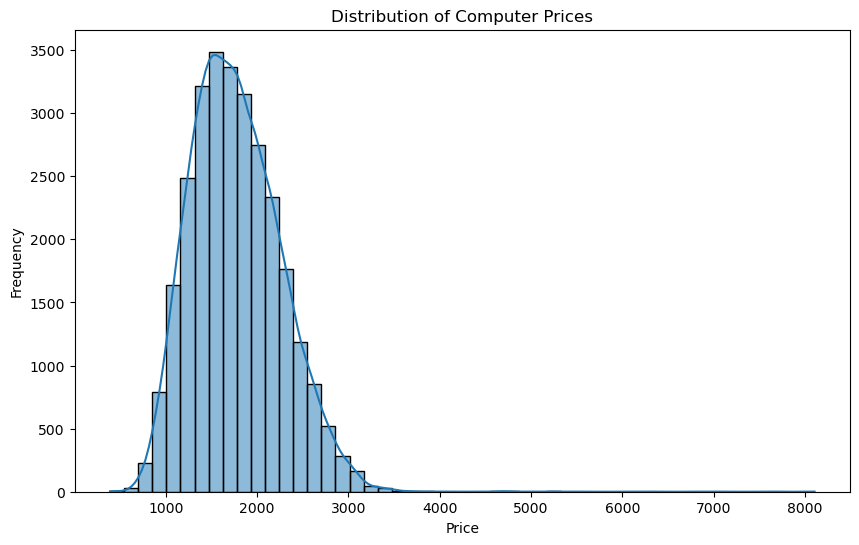

In [281]:
## Understanding distribution of target
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Computer Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


### 2.3.1.2 Understanding distribution of features

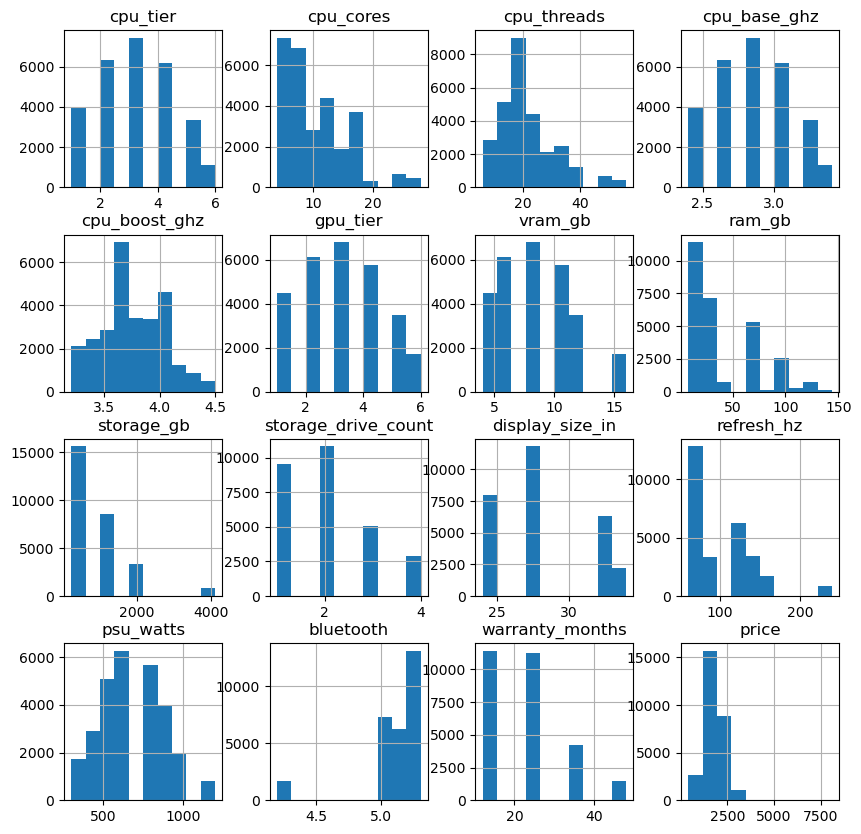

In [282]:
## Understanding distribution of features with histogram
df.hist(figsize=(10,10))
plt.show()

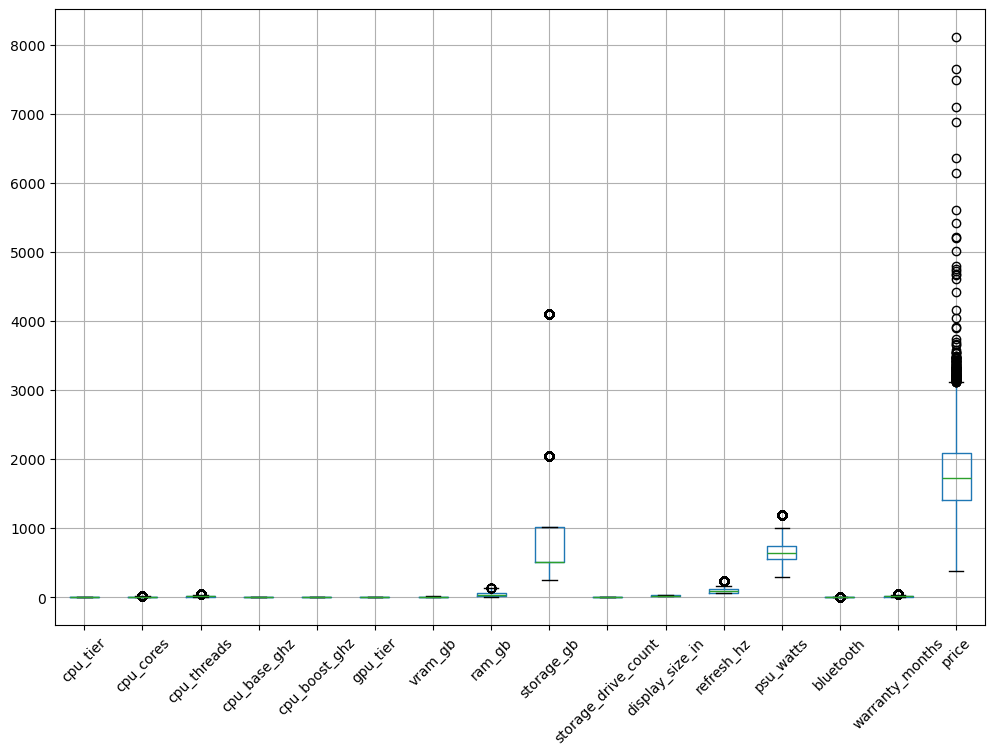

In [283]:
## Plot boxplot to identify outliers

df.boxplot(figsize=(12,8), rot=45)
plt.show()

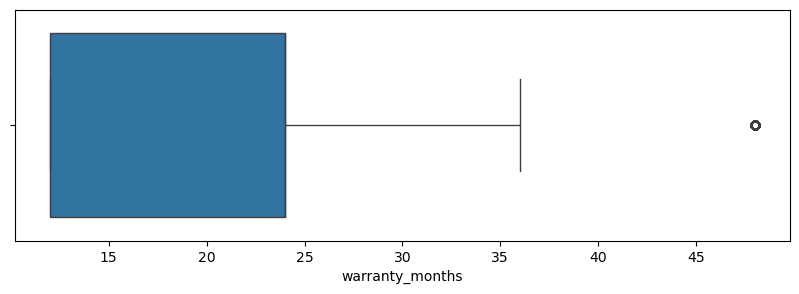

In [284]:
##Show singluar box plots for features with outliers
plt.figure(figsize=(10,3))
sns.boxplot(x=df['warranty_months'])
plt.show()

In this case, although the outliers are realistic values where people may acutally get huge number of RAM or storage, We will remove them as gamers often go for more realistic options, for eg. only 32GB of RAM, or 16-32 threads in their CPU, or uncommon for gamers to have PSU for more than 1k watts

However, we will keep the 2048GB storage option as 2048GB is still more common among gamers due to games requiring high storage, and also the 240 refresh_hz option as it is also common among competitive gamers.


In [285]:
##Remove outliers based on domain knowledge
## (Specific values obtained from Kaggle website or singlular box plot above)
df = df[
        (df['cpu_cores'] <= 20) &
        (df['cpu_threads'] <= 40) &
        (df['ram_gb'] <= 136) & 
        (df['storage_gb'] <= 2048) &
        (df['psu_watts'] <= 1000) &
        (df['bluetooth'] >= 5.0) & 
        (df['warranty_months'] <= 36)
    ]

### 2.3.2 Understanding relationship between variables

In [286]:
## Understanding relationship between variables
## Calculate correlation matrix
col_num = df.select_dtypes(include=['float','int']).columns

df_corr = df[col_num].corr()
df_corr


,cpu_tier,cpu_cores,cpu_threads,cpu_base_ghz,cpu_boost_ghz,gpu_tier,vram_gb,ram_gb,storage_gb,storage_drive_count,display_size_in,refresh_hz,psu_watts,bluetooth,warranty_months,price
cpu_tier,1.000000,0.922922,0.920569,1.000000,0.930742,0.867997,0.856971,0.896070,0.003257,-0.008328,0.000893,0.006893,0.003350,0.010016,0.006475,0.732615
cpu_cores,0.922922,1.000000,0.997178,0.922922,0.858870,0.806271,0.801241,0.875606,0.002770,-0.007132,0.000703,0.005978,0.000788,0.011286,0.003500,0.685500
cpu_threads,0.920569,0.997178,1.000000,0.920569,0.856706,0.803915,0.798710,0.873164,0.003018,-0.007337,-0.000373,0.005257,0.000334,0.011525,0.003418,0.683808
cpu_base_ghz,1.000000,0.922922,0.920569,1.000000,0.930742,0.867997,0.856971,0.896070,0.003257,-0.008328,0.000893,0.006893,0.003350,0.010016,0.006475,0.732615
cpu_boost_ghz,0.930742,0.858870,0.856706,0.930742,1.000000,0.807932,0.797990,0.835349,0.001833,-0.002510,0.002856,0.006769,0.006218,0.008732,0.005848,0.682113
gpu_tier,0.867997,0.806271,0.803915,0.867997,0.807932,1.000000,0.993909,0.905521,0.002708,-0.004903,0.001353,0.001280,0.000176,0.008910,-0.000266,0.763159
vram_gb,0.856971,0.801241,0.798710,0.856971,0.797990,0.993909,1.000000,0.903875,0.002812,-0.004192,0.001430,0.001198,0.000886,0.008850,-0.000521,0.758481
ram_gb,0.896070,0.875606,0.873164,0.896070,0.835349,0.905521,0.903875,1.000000,-0.000809,-0.008214,0.002704,-0.000563,-0.001106,0.003880,0.003095,0.739097
storage_gb,0.003257,0.002770,0.003018,0.003257,0.001833,0.002708,0.002812,-0.000809,1.000000,0.003140,0.012211,0.002587,-0.006840,-0.005549,-0.010700,0.097160
storage_drive_count,-0.008328,-0.007132,-0.007337,-0.008328,-0.002510,-0.004903,-0.004192,-0.008214,0.003140,1.000000,0.005977,0.000817,0.003627,0.004611,0.003590,-0.005902


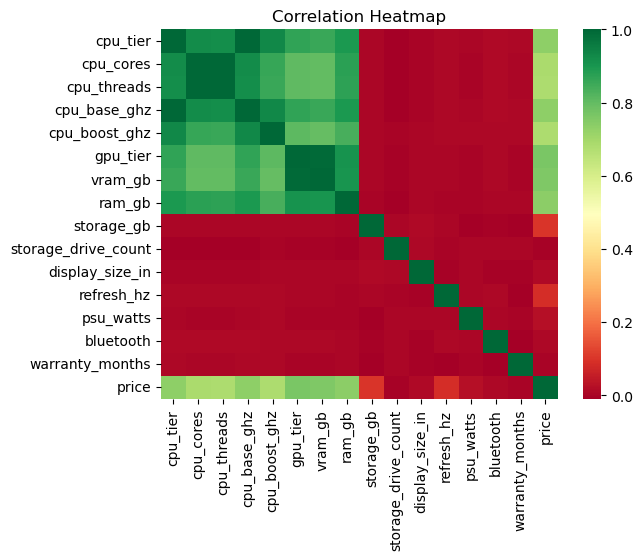

In [287]:
##Plot heatmap
sns.heatmap(df_corr, cmap='RdYlGn') ##RdYlGn: Red-yellow-green
plt.title('Correlation Heatmap')
plt.show()

In [288]:
##Plot pairplot to understand relationships between variables

#sns.pairplot(df)
#plt.show()

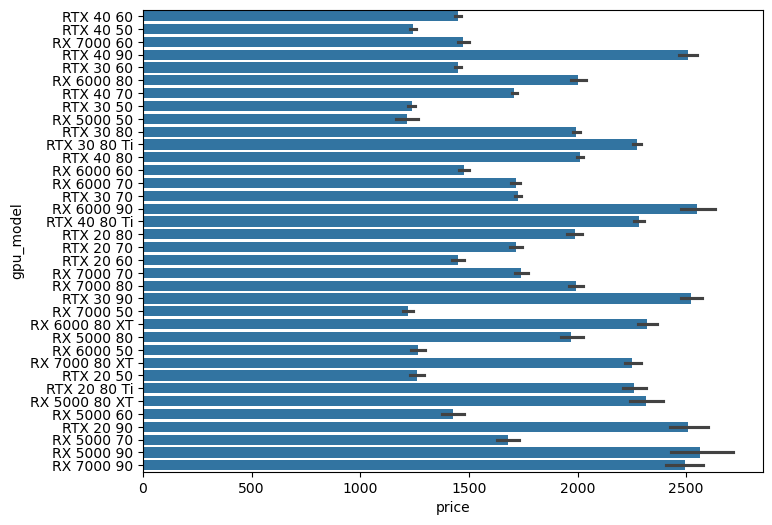

In [289]:
## Show bar plot for GPU brand vs Price
plt.figure(figsize=(8,6))
sns.barplot(y='gpu_model', x='price', data=df)
plt.show()

In [290]:
## Print the list of GPU models

##RTX Series
rtx_series = df[df['gpu_model'].str.contains('RTX')]['gpu_model'].unique()
##Sort based on model number in ascending order (format: RTX XX XX (Ti))
rtx_series = sorted(rtx_series, key=lambda x: int(''.join(filter(str.isdigit, x))))

print("RTX Series GPU Models:")
for model in rtx_series:
    print(model)

##RX Series
rx_series = df[df['gpu_model'].str.contains('RX')]['gpu_model'].unique()
##Sort based on model number in ascending order (format: RX X000 XX (XT))
rx_series = sorted(rx_series, key=lambda x: int(''.join(filter(str.isdigit, x))))

print("\nRX Series GPU Models:")
for model in rx_series:
    print(f"{model} {(14 - len(model))*' '} ({model[:2]} {model[3]}{model[8]}00{' XT' if 'XT' in model else ''})")

RTX Series GPU Models:
RTX 20 50
RTX 20 60
RTX 20 70
RTX 20 80
RTX 20 80 Ti
RTX 20 90
RTX 30 50
RTX 30 60
RTX 30 70
RTX 30 80
RTX 30 80 Ti
RTX 30 90
RTX 40 50
RTX 40 60
RTX 40 70
RTX 40 80
RTX 40 80 Ti
RTX 40 90

RX Series GPU Models:
RX 5000 50      (RX 5500)
RX 5000 60      (RX 5600)
RX 5000 70      (RX 5700)
RX 5000 80      (RX 5800)
RX 5000 80 XT   (RX 5800 XT)
RX 5000 90      (RX 5900)
RX 6000 50      (RX 6500)
RX 6000 60      (RX 6600)
RX 6000 70      (RX 6700)
RX 6000 80      (RX 6800)
RX 6000 80 XT   (RX 6800 XT)
RX 6000 90      (RX 6900)
RX 7000 50      (RX 7500)
RX 7000 60      (RX 7600)
RX 7000 70      (RX 7700)
RX 7000 80      (RX 7800)
RX 7000 80 XT   (RX 7800 XT)
RX 7000 90      (RX 7900)


# 3. Data Preparation

## 3.1 Data Cleaning

We will keep the display specs, storage_gb, and the psu watts as although they have low correlation to price, these are elements that gamers will compare and spend time deciding on, hence it plays an important role in predicting a PC price.

In [ ]:
## Clean data after EDA
##Remove uneeded CPU columns
## Keep CPU tier and CPU threads
df = df.drop(columns=[
    'cpu_boost_ghz',    # not needed as both are highly correlated with cpu base, and cpu base is a better indicator of performance as it has higher correlation with price
    'cpu_tier',  #not needed as cpu_base_ghz is a more specific indicator of performance and has similar correlation with price as cpu_tier
    'cpu_cores',     # not needed as we have cpu_threads, which is a better indicator of performance, and corr
    'cpu_brand',     # not needed as we are only are looking at raw CPU performance via cpu base ghz
    'cpu_model'      # not needed as we are only are looking at raw CPU performance via cpu base ghz
])

## Remove uneeded GPU columns
## Keep GPU model and GPU memory size
df = df.drop(columns=[
    'gpu_brand',      # not needed as we have the gpu model, which indicates the brand as well
    'gpu_tier'        # not needed as we have gpu model, which is a better indicator of performance
])

## Remove other uneeded columns

df = df.drop(columns=[
    'storage_drive_count',       # not needed as storage_type and storage_gb are sufficient
    'wifi',                      # Remove as low correlation with price and not strongly needed
    'bluetooth',
    'warranty_months'
])



df

,os,cpu_threads,cpu_base_ghz,gpu_model,vram_gb,ram_gb,storage_type,storage_gb,display_type,display_size_in,resolution,refresh_hz,psu_watts,price
0,Windows,24,2.8,RTX 40 60,6,16,NVMe,1024,LED,27.0,2560x1440,90,750,1383.99
2,macOS,16,2.6,RTX 40 50,4,8,NVMe,512,LED,32.0,3440x1440,120,850,1879.99
3,Windows,12,2.6,RX 7000 60,6,16,HDD,512,IPS,27.0,3440x1440,120,650,1331.99
5,Windows,32,3.2,RTX 40 90,16,96,NVMe,512,LED,24.0,2560x1440,90,1000,2751.99
11,Windows,10,2.6,RTX 30 60,6,16,NVMe,1024,IPS,32.0,2560x1440,120,750,1366.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99976,Windows,32,3.2,RTX 40 80 Ti,12,96,NVMe,256,IPS,27.0,1920x1080,90,750,1824.99
99983,Windows,12,2.6,RTX 30 70,8,16,NVMe,256,IPS,24.0,3840x2160,60,650,1645.99
99986,Linux,16,2.4,RTX 30 50,4,8,NVMe,1024,IPS,24.0,1920x1080,60,450,990.99
99991,Windows,24,2.8,RTX 30 70,8,32,Hybrid,512,OLED,27.0,2560x1440,60,750,1595.99


In [292]:
## Describe cleaned data distribution

## Describe categorical columns
df.describe(include='object')

,os,gpu_model,storage_type,display_type,resolution
count,22889,22889,22889,22889,22889
unique,4,36,4,6,4
top,Windows,RTX 40 70,NVMe,LED,1920x1080
freq,16438,2023,10305,7383,8618


In [293]:
## Describe numerical columns
df.describe(include=['float','int'])

,cpu_threads,cpu_base_ghz,vram_gb,ram_gb,storage_gb,display_size_in,refresh_hz,psu_watts,price
count,22889.000000,22889.000000,22889.000000,22889.000000,22889.000000,22889.000000,22889.000000,22889.000000,22889.000000
mean,19.451702,2.788711,8.012320,36.396522,802.928918,27.812443,98.360654,662.412076,1728.426367
std,7.973575,0.247402,2.872088,27.598764,542.168566,3.349695,43.359037,173.314615,465.481727
min,6.000000,2.400000,4.000000,8.000000,256.000000,24.000000,60.000000,300.000000,388.990000
25%,12.000000,2.600000,6.000000,16.000000,512.000000,24.000000,60.000000,550.000000,1389.990000
50%,16.000000,2.800000,8.000000,32.000000,512.000000,27.000000,90.000000,650.000000,1691.990000
75%,24.000000,3.000000,10.000000,64.000000,1024.000000,32.000000,120.000000,750.000000,2031.990000
max,40.000000,3.200000,16.000000,112.000000,2048.000000,34.000000,240.000000,1000.000000,8102.990000


## 3.2 Train-Test Split

In [294]:
## Split data into train set and test set
y = df['price'] ## Select target column - Price
# price is numerical variable, so this is a regression problem

col_irrelevant = ['price'] ##List of irrelevant columns
X = df.drop(col_irrelevant, axis=1) ## Drop irrelevant columns // axis=1: drop columns, axis=2: drop rows

##One hot Encoding
X = pd.get_dummies(X,
                   drop_first=True) ## Remove redundant columns (first category)

X ## Display features DataFrame

,cpu_threads,cpu_base_ghz,vram_gb,ram_gb,storage_gb,display_size_in,refresh_hz,psu_watts,os_Linux,os_Windows,...,storage_type_NVMe,storage_type_SSD,display_type_LED,display_type_Mini-LED,display_type_OLED,display_type_QLED,display_type_VA,resolution_2560x1440,resolution_3440x1440,resolution_3840x2160
0,24,2.8,6,16,1024,27.0,90,750,False,True,...,True,False,True,False,False,False,False,True,False,False
2,16,2.6,4,8,512,32.0,120,850,False,False,...,True,False,True,False,False,False,False,False,True,False
3,12,2.6,6,16,512,27.0,120,650,False,True,...,False,False,False,False,False,False,False,False,True,False
5,32,3.2,16,96,512,24.0,90,1000,False,True,...,True,False,True,False,False,False,False,True,False,False
11,10,2.6,6,16,1024,32.0,120,750,False,True,...,True,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99976,32,3.2,12,96,256,27.0,90,750,False,True,...,True,False,False,False,False,False,False,False,False,False
99983,12,2.6,8,16,256,24.0,60,650,False,True,...,True,False,False,False,False,False,False,False,False,True
99986,16,2.4,4,8,1024,24.0,60,450,True,False,...,True,False,False,False,False,False,False,False,False,False
99991,24,2.8,8,32,512,27.0,60,750,False,True,...,False,False,False,False,True,False,False,True,False,False


# 4. Modelling

### 4.2 Train Model

In [295]:
## Initialise and train model
from sklearn.model_selection import train_test_split

## Split data into training and testing sets
test_size = 0.3 ## 30% for testing
random_state = 2025 ## For reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=test_size,
                                                    random_state=random_state)

In [296]:
## Use Linear Regression model
from sklearn.linear_model import LinearRegression

## Initialize model
linr = LinearRegression(fit_intercept=True) ## Whether to calculate the intercept for this model
linr.fit(X_train, y_train) ##Train model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [297]:
## Use Decision Tree Regressor model
from sklearn.tree import DecisionTreeRegressor

##Initialize model
dtr = DecisionTreeRegressor(random_state=random_state)
dtr.fit(X_train, y_train) ## Train model

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,2025
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [298]:
## Use Gradient Boosting Regressor model
from sklearn.ensemble import GradientBoostingRegressor

##Initialize model
gbr = GradientBoostingRegressor(random_state=random_state)
gbr.fit(X_train, y_train) ## Train model

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


# 5. Model Evaluation

In [299]:
## Evaluate model
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
y_pred_linr = linr.predict(X_test) ## Predict target for testing set
y_pred_dtr = dtr.predict(X_test) ## Predict target for testing set
y_pred_gbr = gbr.predict(X_test) ## Predict target for testing set

accuracy_linr = linr.score(X_test, y_test)
accuracy_dtr = dtr.score(X_test, y_test)
accuracy_gbr = gbr.score(X_test, y_test)

## Print evaluation metrics
print("Linear Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_linr)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_linr)}")
print(f"Root Mean Squared Error (RMSE): {root_mean_squared_error(y_test, y_pred_linr)}")
print(f"R-squared (R2 ): {r2_score(y_test, y_pred_linr)}")
print(f"Accuracy: {round(accuracy_linr * 100, 2)}%")


print("\nDecision Tree Regressor Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_dtr)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_dtr)}")
print(f"Root Mean Squared Error (RMSE): {root_mean_squared_error(y_test, y_pred_dtr)}")
print(f"R-squared (R2 ): {r2_score(y_test, y_pred_dtr)}")
print(f"Accuracy: {round(accuracy_dtr * 100, 2)}%")

print("\nGradient Boosting Regressor Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_gbr)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_gbr)}")
print(f"Root Mean Squared Error (RMSE): {root_mean_squared_error(y_test, y_pred_gbr)}")
print(f"R-squared (R2 ): {r2_score(y_test, y_pred_gbr)}")
print(f"Accuracy: {round(accuracy_gbr * 100, 2)}%")


Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 144.83525478397814
Mean Squared Error (MSE): 53663.44789129719
Root Mean Squared Error (RMSE): 231.65372410409722
R-squared (R2 ): 0.7622800455847001
Accuracy: 76.23%

Decision Tree Regressor Model Evaluation:
Mean Absolute Error (MAE): 219.87956895296344
Mean Squared Error (MSE): 105289.82110091741
Root Mean Squared Error (RMSE): 324.48393042016335
R-squared (R2 ): 0.5335839858220458
Accuracy: 53.36%

Gradient Boosting Regressor Model Evaluation:
Mean Absolute Error (MAE): 147.21973749395485
Mean Squared Error (MSE): 54692.45368796106
Root Mean Squared Error (RMSE): 233.86417786390686
R-squared (R2 ): 0.7577217247781145
Accuracy: 75.77%


In [151]:
## New data

## Predict


## Iterative model development


In [152]:
## Further feature engineering / feature selection